In [5]:


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bank_path = "/content/drive/MyDrive/Connection/bank.csv"
medical_student_path = "/content/drive/MyDrive/Connection/medical_students_dataset.csv"
titanic_path = "/content/drive/MyDrive/Connection/Titanic-Dataset.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Load and inspect bank.csv

bank_df = pd.read_csv(bank_path)

print("First 5 rows:")
display(bank_df.head())

print("\nInfo:")
bank_df.info()

# (a) Object dtype columns
object_cols = bank_df.select_dtypes(include="object").columns
print("\n(a) Object dtype columns:")
print(list(object_cols))

# (b) Unique values in those columns
print("\n(b) Unique values:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(bank_df[col].unique())

# (c) Null values
print("\n(c) Null values in each column:")
print(bank_df.isnull().sum())



First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

(a) Object dtype columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'co

In [7]:
bank_numeric_df = bank_df.drop(columns=object_cols)

print("Numeric DataFrame:")
display(bank_numeric_df.head())

# Save to CSV
bank_numeric_df.to_csv("banknumericdata.csv", index=False)
print("\nSaved as banknumericdata.csv")

#Load numeric CSV and get summary

df_num = pd.read_csv("banknumericdata.csv")

print("Info:")
df_num.info()

print("\nSummary Statistics:")
display(df_num.describe())

Numeric DataFrame:


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0



Saved as banknumericdata.csv
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


"""Problem 2 - Data Imputations"""

In [8]:
#Load medical_student.csv

medical_df = pd.read_csv(medical_student_path)

print("First 5 rows:")
display(medical_df.head())

print("\nInfo:")
medical_df.info()

print("\nMissing values:")
print(medical_df.isnull().sum())

#Impute missing values

num_cols = medical_df.select_dtypes(include=[np.number]).columns
cat_cols = medical_df.select_dtypes(include="object").columns

medical_imputed = medical_df.copy()

# Numeric = median
for col in num_cols:
    if medical_imputed[col].isnull().sum() > 0:
        med = medical_imputed[col].median()
        medical_imputed[col].fillna(med, inplace=True)
        print(f"Filled numeric column '{col}' with median = {med}")

# Categorical = mode
for col in cat_cols:
    if medical_imputed[col].isnull().sum() > 0:
        mode_val = medical_imputed[col].mode()[0]
        medical_imputed[col].fillna(mode_val, inplace=True)
        print(f"Filled categorical column '{col}' with mode = {mode_val}")

print("\nMissing values after imputation:")
print(medical_imputed.isnull().sum())

display(medical_imputed.head())

#Remove duplicates

duplicates_before = medical_imputed.duplicated().sum()
print("Duplicates before:", duplicates_before)

medical_no_dup = medical_imputed.drop_duplicates()

duplicates_after = medical_no_dup.duplicated().sum()
print("Duplicates after:", duplicates_after)

print("\nShape before:", medical_imputed.shape)
print("Shape after: ", medical_no_dup.shape)


First 5 rows:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Bl

/tmp/ipython-input-2838590397.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_imputed[col].fillna(med, inplace=True)
/tmp/ipython-input-2838590397.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Filled categorical column 'Blood Type' with mode = B
Filled categorical column 'Diabetes' with mode = No
Filled categorical column 'Smoking' with mode = No

Missing values after imputation:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.599654,95.0,109.0,203.0,No,No
1,2.0,26.0,Male,152.069157,47.630941,B,22.671401,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,49943.5,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,174.899914,46.234173,O,22.671401,98.480008,95.0,115.0,231.0,No,No


Duplicates before: 12879
Duplicates after: 0

Shape before: (200000, 13)
Shape after:  (187121, 13)


"""3.2 Exercises"""

In [9]:
#Titanic Setup
titanic_df = pd.read_csv(titanic_path)

print("First 5 rows:")
display(titanic_df.head())

print("\nInfo:")
titanic_df.info()

"""Problem 1"""

cols_needed = ["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]
subset_df = titanic_df[cols_needed]

first_class = subset_df[subset_df["Pclass"] == 1]

print("First 5 rows of first-class passengers:")
display(first_class.head())

print("\nFare Statistics:")
print("Mean:", first_class["Fare"].mean())
print("Median:", first_class["Fare"].median())
print("Max:", first_class["Fare"].max())
print("Min:", first_class["Fare"].min())


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
First 5 rows of first-class passengers:


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1



Fare Statistics:
Mean: 84.1546875
Median: 60.287499999999994
Max: 512.3292
Min: 0.0


"""Problem 2"""

In [10]:
print("Null Age values:", first_class["Age"].isnull().sum())

first_class_no_null_age = first_class.dropna(subset=["Age"])

print("\nBefore:", first_class.shape)
print("After:", first_class_no_null_age.shape)

display(first_class_no_null_age.head())

Null Age values: 30

Before: (216, 6)
After: (186, 6)


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


"""Problem 3"""

In [11]:
embarked_dummies = pd.get_dummies(titanic_df["Embarked"], prefix="Embarked")

titanic_encoded = pd.concat([titanic_df, embarked_dummies], axis=1)
titanic_encoded.drop(columns=["Embarked"], inplace=True)

print("After encoding:")
display(titanic_encoded.head())

After encoding:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


"""Problem 4"""

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


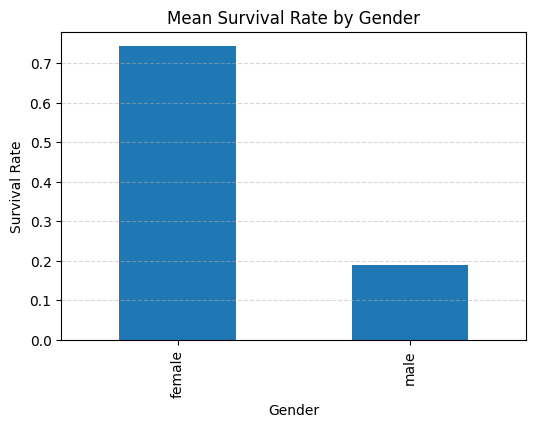

In [12]:
survival_by_gender = titanic_df.groupby("Sex")["Survived"].mean()
print(survival_by_gender)

plt.figure(figsize=(6,4))
survival_by_gender.plot(kind="bar")
plt.title("Mean Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

"""Problem 5"""

Survival table:


Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


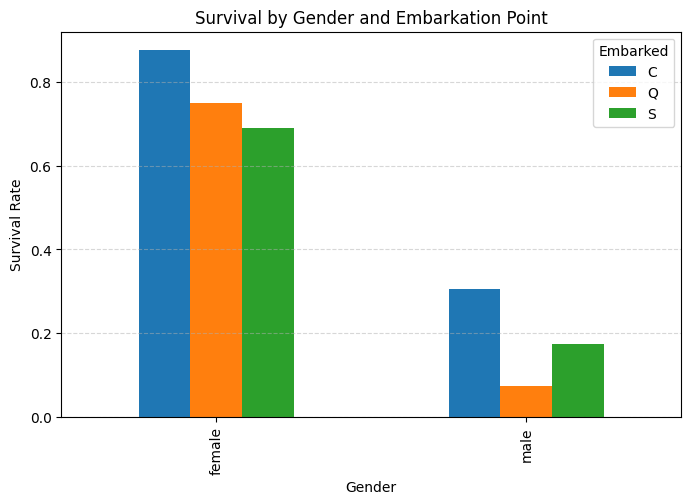

In [13]:
titanic_no_null = titanic_df.dropna(subset=["Embarked"])

survival_se = (
    titanic_no_null.groupby(["Sex", "Embarked"])["Survived"]
    .mean()
    .unstack("Embarked")
)

print("Survival table:")
display(survival_se)

survival_se.plot(kind="bar", figsize=(8,5))
plt.title("Survival by Gender and Embarkation Point")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

"""Problem 6"""

Survival table:


/tmp/ipython-input-2787445522.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby(["AgeGroup", "Pclass"])["Survived"]


Pclass,1,2,3
AgeGroup,,,
"(0.419, 19.0]",0.809524,0.742857,0.333333
"(19.0, 25.0]",0.761905,0.400000,0.197674
"(25.0, 31.8]",0.666667,0.416667,0.283582
"(31.8, 41.0]",0.777778,0.461538,0.166667
"(41.0, 80.0]",0.506667,0.363636,0.088235


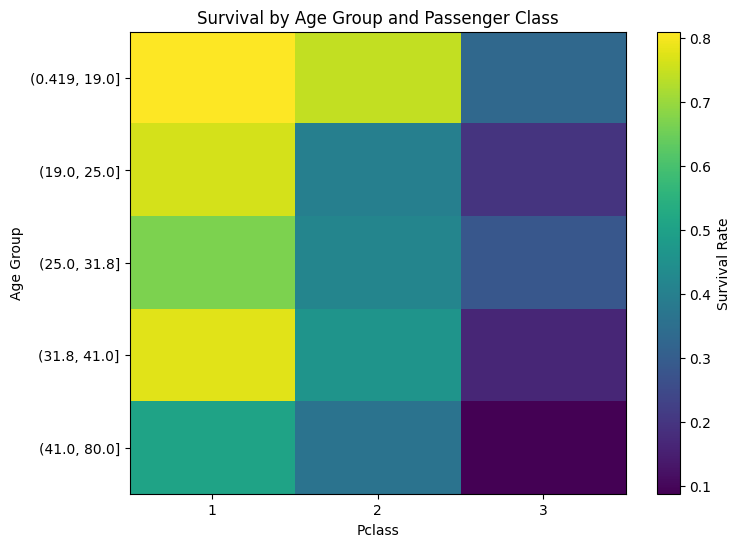

In [14]:
df_age = titanic_df.dropna(subset=["Age"]).copy()
df_age["AgeGroup"] = pd.qcut(df_age["Age"], 5)

surv_age_class = (
    df_age.groupby(["AgeGroup", "Pclass"])["Survived"]
    .mean()
    .unstack("Pclass")
)

print("Survival table:")
display(surv_age_class)

plt.figure(figsize=(8,6))
plt.imshow(surv_age_class, aspect="auto")
plt.colorbar(label="Survival Rate")

plt.xticks(range(3), surv_age_class.columns)
plt.yticks(range(len(surv_age_class.index)), surv_age_class.index)

plt.title("Survival by Age Group and Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Age Group")
plt.show()